# Working with CATEGORICAL data in Pandas:

<a target="_blank" href="https://colab.research.google.com/github/JovianHQ/notebooks/blob/main/data-analysis-and-visualization-with-python/advanced-data-analysis-techniques/categorical-data-with-pandas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
 
Pandas is the defacto toolbox for Python data scientists to ease the data analysis process. You can use it before you start analyzing, to collect, explore, and format the data. Pandas makes these steps a breeze via its numerous I/O and handy data manipulation functions.

**During Data analysis**, you must have encountered non-numeric datatypes mainly dates and some repetitive values called categorical datatypes. 

**In this tutorial**, you’ll learn the common tricks to handle **'categorical'** type of data and preprocess it to build machine learning models with them. 

### Prerequisites:
- You should be familiar with Pandas data structures. Here's a [notebook](https://jovian.ai/aakashns/python-pandas-data-analysis) by Aakash NS for pandas from the very start.
- You can find help with running this notebook online using this helper [notebook](https://jovian.ml/aakashns/05-cifar10-cnn/v/51&cellId=2).


## Loading Datasets into colab:
I have used opendatsets, which is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

In [1]:
!pip install opendatasets --upgrade --quiet

Steps involved in using opendatasets:

* Mention the url of the dataset into a variable lets say, url_variable.
* Import the dataset library after installing it.
- Use `od.download(url_variable)`
- Colab will ask for kaggle username and key which you can find on your kaggle profile.
- Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens
- Click on Create New API Token - It will download kaggle.json file on your machine. (which contains the required information to download the dataset on your colaboratory)

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np

In [3]:
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: himanigulati
Your Kaggle Key: ··········


  2%|▏         | 5.00M/299M [00:00<00:07, 42.4MB/s]

100%|██████████| 299M/299M [00:02<00:00, 122MB/s]

In [5]:
!ls # navigating into colab's Local Directory

sample_data  us-accidents


In [4]:
from google.colab import files
Path = '/content/us-accidents/US_Accidents_Dec20.csv'

In [5]:
raw_df = pd.read_csv(Path)
print("Dataframe size",raw_df.shape)
raw_df.head(2)

Dataframe size (4232541, 49)


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


So the dataset I have used for this tutorial contains about 4 million rows and 49 columns. This dataset is about accidents happening in the United States. For this tutorial let's just consider a sample of this data.  

More information on the dataset I have used in this tutorial can be found [here](https://smoosavi.org/datasets/us_accidents).Or you can directly download the dataset from [kaggle](https://www.kaggle.com/sobhanmoosavi/us-accidents). 

In [6]:
raw_df = raw_df.sample(frac = 0.1) #10%
raw_df.shape

(423254, 49)

Well, that reduced our dataset to One-tenth of its size. 

Lets begin with what are categorical datatypes: 
#  Categorical Datatypes:

Categorical features can only take on a limited, and usually a fixed number of possible values. For example, in our dataset, i.e related to the number of accidents occurring in the US, typical columns for categorical data will be, accident location, timezone, airport_codes...etc. These are nominal features, where there is no order associated with categories. When there is order associated with them, they are called ordinal features. (eg.. small, medium, large)

Few reasons why categorical values can be difficult to deal with are:
- High cardinality (Features with a large number of levels)

- Algebraic Machine Learning models, whose input must be numerical. (Hence categorical must be transformed into numbers before applying a learning algorithm to them)
- It is difficult for an ML model to differentiate between highly different levels. For example, for an ML model, New York, New Jersey, and New Delhi are just three different levels.


Hence we are challenged to figure out how we can turn these text values into numerical types for further processing and unmask information hidden among these features.

Let's start with gathering information about our dataset: 



In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

The columns with `object` datatype are possible categorical features in our dataset. But you cannot wholly rely on `.info`, so its important that you investigate your raw dataset thouroughly and then clean it. 



Visually exploring the data is one of the best ways to extract information between variables which shall be our next step. 
But when it comes to categorical data, plotting the boxplot is the best way **to analyse the relationship between a continous and a categorical value**. 
Let's first start with some basic plots, then talk a little about boxplots. 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

One Exploratory Data Analysis step that you might want to do on categorical features is the frequency distribution of categories within the feature, which can be done with the `.value_counts()` method.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


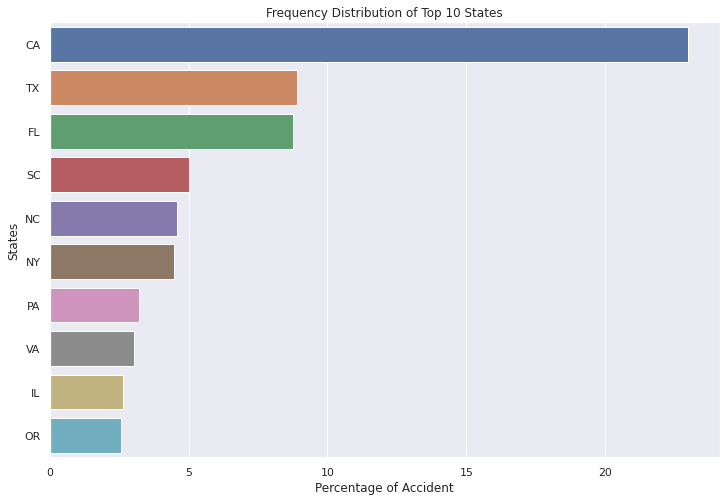

CPU times: user 645 ms, sys: 9.64 ms, total: 655 ms
Wall time: 681 ms


In [10]:
%%time

state_percentage = raw_df['State'].value_counts() *100/len(raw_df)
sns.set(style="darkgrid")

# state_count
plt.figure(figsize=(12,8))
sns.barplot( state_percentage.values[:10], state_percentage.index[:10])
plt.title('Frequency Distribution of Top 10 States')

plt.ylabel('States', fontsize=12)
plt.xlabel('Percentage of Accident', fontsize=12)
#plt.xticks(rotation = 45)
plt.show()

This graph depicts the state that has the highest number of accidents, which we can see is CA - California. 
We can get the same information with the help matplotlib's pie chart. 
Note that the above plot took up a total wall time of around 700 ms. 


**Tip:** In Pandas, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using `.astype()` method on your columns as shown below:

In [7]:
cat = ['Source', 'Street', 'Side', 'City', 'County', 'State','Zipcode','Country', 'Timezone', 'Airport_Code','Wind_Direction','Weather_Condition', 'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
raw_df[cat] = raw_df[cat].astype("category")

raw_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 423254 entries, 2184990 to 2678249
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   ID                     423254 non-null  object  
 1   Source                 423254 non-null  category
 2   TMC                    271598 non-null  float64 
 3   Severity               423254 non-null  int64   
 4   Start_Time             423254 non-null  object  
 5   End_Time               423254 non-null  object  
 6   Start_Lat              423254 non-null  float64 
 7   Start_Lng              423254 non-null  float64 
 8   End_Lat                151656 non-null  float64 
 9   End_Lng                151656 non-null  float64 
 10  Distance(mi)           423254 non-null  float64 
 11  Description            423254 non-null  object  
 12  Number                 154404 non-null  float64 
 13  Street                 423254 non-null  category
 14  Side         

You can validate operations on the `category dtype` by timing the execution time of few data retrieving operations on this dataframe with columns as `category` dtype and even as `object` dtype with the `%%time` magic command in the cells below to compare the time taken in both cases. 




You will notice that operations on dataframe with the `category` dtype will be much faster. 

## Handling Missing Data/Null Values,  
Handling Missing Data/Null Values is one of the most important data pre-processing steps. It is a huge problem for data analysis because it misshapes our results. It’s difficult to be fully confident in the insights when you know that some entries are missing values.  

Below I have mentioned a few ways to **Handle missing values in Categorical Columns.**  I have used only a few columns of our entire dataframe to understand these methods. 

In [12]:
accidents_df=raw_df[['ID', 'Severity', 'Start_Time', 'City', 'State','Source', 'Airport_Code', 'Roundabout', 'Timezone']]
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 9 columns):
 #   Column        Dtype   
---  ------        -----   
 0   ID            object  
 1   Severity      int64   
 2   Start_Time    object  
 3   City          category
 4   State         category
 5   Source        category
 6   Airport_Code  category
 7   Roundabout    bool    
 8   Timezone      category
dtypes: bool(1), category(5), int64(1), object(2)
memory usage: 129.7+ MB


In [ ]:
print(accidents_df.isnull().sum())

ID                 0
Severity           0
Start_Time         0
City              70
State              0
Source             0
Airport_Code    4438
Roundabout         0
Timezone        2311
dtype: int64


The number of categories in each column with missing values:


In [ ]:
print("Number of Categories in: ") 
for ColName in accidents_df[['City','Airport_Code','Timezone']]:
    print("{} = {}".format(ColName, len(accidents_df[ColName].unique())))

Number of Categories in: 
City = 11289
Airport_Code = 1994
Timezone = 5


### 1. Frequent Categorical Imputation:

This is a method in which we **assume** that there is random order of missing values(MAR - Missing at Random) and there's a majority of these missing values. 

Under this approach we replace the missing values with the most common class, Hence the first step is to find out which category occurred most in each category using `mode()`.
* [The mode of a set of values is the value that appears most often]

In [ ]:
### Frequent Categorical Imputation:

# Step 1 --> defining function to replace NAN values with the MOD value:

def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)


The next step is to replace all NAN values in that column with that category

In [ ]:
#Step2  - > Calling the function to create Imputed columns with replaced null values! 

for Columns in ['City','Airport_Code','Timezone']:
    impute_nan_most_frequent_category(accidents_df,Columns)
    
# Displaying imputed result
accidents_df[['City','City_Imputed','Airport_Code','Airport_Code_Imputed','Timezone','Timezone_Imputed']].sample(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,City,City_Imputed,Airport_Code,Airport_Code_Imputed,Timezone,Timezone_Imputed
3126140,Fort Washington,Fort Washington,KDCA,KDCA,US/Eastern,US/Eastern
2690204,Easley,Easley,KGYH,KGYH,US/Eastern,US/Eastern
1623007,Flint,Flint,KFNT,KFNT,US/Eastern,US/Eastern
1088536,Augusta,Augusta,KAGS,KAGS,US/Eastern,US/Eastern
4109276,Victorville,Victorville,KVCV,KVCV,US/Pacific,US/Pacific


In [ ]:
print(accidents_df.isnull().sum())

ID                         0
Severity                   0
Start_Time                 0
City                      70
State                      0
Source                     0
Airport_Code            4438
Roundabout                 0
Timezone                2311
City_Imputed               0
Airport_Code_Imputed       0
Timezone_Imputed           0
dtype: int64


Now you can see that there has been an addition of imputed columns that have zero null values, while the original columns continue to hold those null values which we will drop in our last step. 

The Last step is to Drop our original columns and keep the newly imputed ones. 

In [ ]:
# Step3
accidents_df = accidents_df.drop(['City','Airport_Code','Timezone'], axis = 1)

This is a very simple and one of the most basic approaches to handle missing values in our categorical columns, yet not a preferred one. 
* This can distort the relation of the most frequent class and, 
* Predictions may become biased due to columns that have max number of null values.

So lets have a look at other ways to do the same and more efficiently. 


### 2. Adding a variable to capture NaN: 
We use this approach without considering any assumptions, hence can be implemented on all kinds of categorical columns. 

In this approach, we replace the NAN categories with the most occurred values but in this case, we add a new feature to introduce some weight/importance to the non-imputed and imputed columns. Let's define our dataframe again, 

In [ ]:
accidents_df=raw_df[['ID', 'Severity', 'Start_Time', 'City', 'State','Source', 'Airport_Code', 'Roundabout', 'Timezone']]

The first step is to create a new column and replace 1 if our feature value is NAN else 0. This column is an important column to the imputed category.  

Next, we replace NAN value with the most occurred category in the actual column.


In [9]:
def impute_nan_add_vairable(DataFrame,ColName):
    #1. add new column and replace if category is null then 1 else 0
    #DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),1,0) # fillna(0).astype(int))

    DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),True,False)
    
    # 2. Finding the most occured category in that vairable (.mode())
    
    Mode_Category = DataFrame[ColName].mode()[0]
    
    ## 2.1 Replace NAN values with most occured category in actual vairable
    
    DataFrame[ColName].fillna(Mode_Category,inplace=True)


In [ ]:
for Columns in ['City','Airport_Code','Timezone']:
    impute_nan_add_vairable(accidents_df,Columns)
    
# Displaying imputed result
accidents_df[['City','City_Imputed','Airport_Code','Airport_Code_Imputed','Timezone','Timezone_Imputed']].sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,City,City_Imputed,Airport_Code,Airport_Code_Imputed,Timezone,Timezone_Imputed
3918295,Cincinnati,False,KLUK,False,US/Eastern,False
3761919,Irvine,False,KSNA,False,US/Pacific,False
2050009,Tucson,False,KTUS,False,US/Mountain,False
2199871,Marquette Heights,False,KPIA,False,US/Central,False
1726608,Grand Prairie,False,KGPM,False,US/Central,False


Again this method too has some disadvantages like,
* Creating additional columns can cause Curse of Dimentionality. 
* For the Imputed Column to have value, Potentially misunderstood data & the number of missing data should be large enough. 

### 3. Create a new Category for NAN Values:

Another approach to handling missing values is a very straightforward one. Again this approach can be applied to all categorical columns since we do not consider any assumptions. It has a very simple implementation. We create a new category, lets call it 'the Random Category' for all missing values. 

In [13]:
accidents_df=raw_df[['ID', 'Severity', 'Start_Time', 'City', 'State','Source', 'Airport_Code', 'Roundabout', 'Timezone']]

I will replace NAN values with a new name, I have used the name "Unknown" here.


In [ ]:
def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])


In [ ]:
## Call function to create new category for variables
for Columns in ['City','Airport_Code','Timezone']:
    impute_nan_create_category(accidents_df,Columns)

accidents_df[['City','Airport_Code','Timezone']].sample(10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Airport_Code,Timezone
238477,Hatfield,KLOM,US/Eastern
3748030,Monrovia,KEMT,US/Pacific
1205139,Baton Rouge,KBTR,US/Central
2294575,Lexington,KCAE,US/Eastern
3695520,Portland,KPDX,US/Pacific
3999597,Englewood,KAPA,US/Mountain
3413124,Jacksonville,KJAX,US/Eastern
4086862,Saint Paul,KMSP,US/Central
1188501,San Jose,KSJC,US/Pacific
3269490,Crows Landing,KMOD,US/Pacific


This approach preserves the variance of our data. But if the missing data is more, we will land up creating only more random data. Hence this approach doesn't give us good results when there is a high percentage of missing data. 

#### Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded into numbers before we can use it to fit and evaluate a model. So another important step while dealing with categorical data is to encode our classes.  


# Encoding categorical data:

I'll continue to work with a small part of the entire data frame to understand these encoding techniques. I'll use the 2nd technique I mentioned to handle null values from it first and let us see what our final dataframe looks like.

In [10]:
accidents_df=raw_df[['ID', 'Severity', 'Start_Time', 'City', 'State','Source', 'Airport_Code', 'Roundabout', 'Timezone']]

for Columns in ['City','Airport_Code','Timezone']:
    impute_nan_add_vairable(accidents_df,Columns)

accidents_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,ID,Severity,Start_Time,City,State,Source,Airport_Code,Roundabout,Timezone,City_Imputed,Airport_Code_Imputed,Timezone_Imputed
2184990,A-2185109,2,2018-04-12 15:38:29,Chapin,SC,MapQuest,KFDW,False,US/Eastern,False,False,False
3150724,A-3153670,2,2020-12-04 05:07:00,Davidsville,PA,Bing,KJST,False,US/Eastern,False,False,False
2897501,A-2897631,2,2017-04-04 17:51:35,Oklahoma City,OK,Bing,KPWA,False,US/Central,False,False,False
993362,A-993456,3,2019-12-02 15:05:51,Bellaire,TX,MapQuest,KMCJ,False,US/Central,False,False,False
3075896,A-3077803,2,2020-11-25 13:01:30.000000000,Houston,TX,Bing,KIAH,False,US/Central,False,False,False


Since we will only be looking at encoding techniques, I dont think we require these importance columns, so for now we can drop these imputed columns.  

In [11]:
accidents_df.drop(columns=['City_Imputed','Airport_Code_Imputed','Timezone_Imputed'], inplace=True)
accidents_df.head(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ID,Severity,Start_Time,City,State,Source,Airport_Code,Roundabout,Timezone
2184990,A-2185109,2,2018-04-12 15:38:29,Chapin,SC,MapQuest,KFDW,False,US/Eastern
3150724,A-3153670,2,2020-12-04 05:07:00,Davidsville,PA,Bing,KJST,False,US/Eastern


### 1. Replacing Values: 

This is one of the most basic approaches and very straightforward to implement. We can just replace the categories with the desired numbers by putting them all together. This can easily be done with the `replace()` function in pandas. The idea is that we have the liberty to choose whatever numbers we want to assign to the categories according to the business use case. 

We first create a dictionary that will contain mapping numbers(i.e the replacement) for the categories in our category column.

  I will apply this encoding technique to the `'Timezone'` column of our dataframe:

In [ ]:
accidents_df['Timezone'].unique()

['US/Pacific', 'US/Central', 'US/Eastern', 'US/Mountain']
Categories (4, object): ['US/Pacific', 'US/Central', 'US/Eastern', 'US/Mountain']

In [23]:
replace_map = {'Timezone': {'US/Eastern': 1, 'US/Pacific': 2, 'US/Central': 3, 'US/Mountain': 4}}

The reason I have picked up the `Timezone` column is because it has a lower  number of categories. Which is why mapping is possible via a hard coded dictionary. When category count is high, typing out each mapping is not possible, which is why we cant use this technique with several categories. 


In [24]:
accidents_df_replace = accidents_df.copy()

accidents_df_replace.replace(replace_map, inplace=True)
accidents_df_replace.sample(5)

,ID,Severity,Start_Time,City,State,Source,Airport_Code,Roundabout,Timezone
1451884,A-1451989,2,2019-04-04 07:54:39,Arnold,MO,MapQuest,KCPS,False,3
1072753,A-1072850,3,2019-10-22 06:45:30,Hartford,CT,MapQuest,KHFD,False,1
2157981,A-2158100,2,2018-05-29 17:09:50,Phoenix,AZ,MapQuest,KPHX,False,4
728632,A-728709,3,2020-08-15 09:38:51,Detroit,MI,MapQuest,KDET,False,1
1435524,A-1435629,2,2019-05-30 06:31:46,Oak Brook,IL,MapQuest,KMDW,False,3


You can see the `Timezone` column encoded as the mapped numbers in the dataframe above.

### 2. Label Encoding:

Another approach to encode categorical data is to convert each value in the column into a number. We use this encoding technique when the categorical feature is ordinal, i.e like I mentioned above, ordered categories. Hence encoding should reflect the sequence. 

In Label encoding, each label is converted into an integer value and these integers are always between 0 and num_categories-1. 
One way of achieving this is by using pandas `cat.codes` on our categorical column. 


In [20]:
accidents_df_lc = accidents_df.copy()

accidents_df_lc['Timezone'] = accidents_df_lc['Timezone'].cat.codes

accidents_df_lc.head(5)

,ID,Severity,Start_Time,City,State,Source,Airport_Code,Roundabout,Timezone
0,A-1,3,2016-02-08 05:46:00,Dayton,OH,MapQuest,KFFO,False,1
1,A-2,2,2016-02-08 06:07:59,Reynoldsburg,OH,MapQuest,KCMH,False,1
2,A-3,2,2016-02-08 06:49:27,Williamsburg,OH,MapQuest,KI69,False,1
3,A-4,3,2016-02-08 07:23:34,Dayton,OH,MapQuest,KDAY,False,1
4,A-5,2,2016-02-08 07:39:07,Dayton,OH,MapQuest,KMGY,False,1


In [21]:
print(accidents_df['Timezone'].unique())
accidents_df_lc['Timezone'].unique()

['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain']
Categories (4, object): ['US/Eastern', 'US/Pacific', 'US/Central', 'US/Mountain']


array([1, 3, 0, 2], dtype=int8)

Here's the different numerical equivalents of the categories in `Timezone` column using label encoder.

You can also achieve this with the help of `scikit-learn`'s - `LabelEncoder` or `category_encoders`:

In [25]:
!pip install category_encoders --quiet

     |████████████████████████████████| 81kB 3.2MB/s 


In [ ]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Source'],return_df=True)
accidents_df_lc = accidents_df.copy()

accidents_df_lc = encoder.fit_transform(accidents_df_lc)

accidents_df_lc.sample(10)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,ID,Severity,Start_Time,City,State,Source,Airport_Code,Roundabout,Timezone
44085,A-44086,3,2016-06-24 17:37:17,Los Angeles,CA,1,KHHR,False,US/Pacific
3436106,A-3442886,2,2020-05-24 14:08:00,Ventura,CA,2,KOXR,False,US/Pacific
3078129,A-3080068,2,2020-12-01 18:58:00.000000000,Austin,TX,2,KAUS,False,US/Central
1977109,A-1977222,2,2018-08-28 18:19:29,Lake Zurich,IL,1,KPWK,False,US/Central
2121619,A-2121737,2,2018-05-11 14:04:07,Columbia,SC,1,KCUB,False,US/Eastern
2275337,A-2275456,2,2018-03-27 16:19:08,Lexington,SC,1,KCAE,False,US/Eastern
2022854,A-2022968,2,2018-07-23 20:57:20,Elgin,IL,1,KDPA,False,US/Central
3609490,A-3616314,2,2020-04-03 13:39:29,Telford,PA,2,KUKT,False,US/Eastern
2933866,A-2933996,3,2017-06-18 08:46:04,Edgewater,FL,2,KEVB,False,US/Eastern
2598785,A-2598907,2,2017-09-08 12:45:49,Raleigh,NC,1,KRDU,False,US/Eastern


In [ ]:
accidents_df['Source'].unique()

['MapQuest', 'Bing', 'MapQuest-Bing']
Categories (3, object): ['MapQuest', 'Bing', 'MapQuest-Bing']

You can see the column `State` has numeric encoded values equal to the number of categories.  

In [ ]:
accidents_df_lc['State'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

### 3. One Hot Encoding: 

This encoding technique is used when the features are nominal i.e do not have any order. For example in this dataset, the column `Airport_Codes` is categorical but we cant arrange them in a sequence. 

In one hot encoding, for each level of a categorical feature, we create a new variable. In simple terms, each category is converted into a new column. Then, each category is mapped with a binary variable containing either 0 or 1, where 0 represents the absence and 1 represents the presence of that category. 
These newly created binary features/columns are called **Dummy Variables** and are = no. of categories in a column. 

The simplest way to use this encoding tactic is by using `pandas` `.get_dummies()` method.  This function takes 3 arguments: dataframe, columns to perform encoding on, and lastly, the `prefix` argument that will allow us to specify the prefix for the new columns that will be created.

 

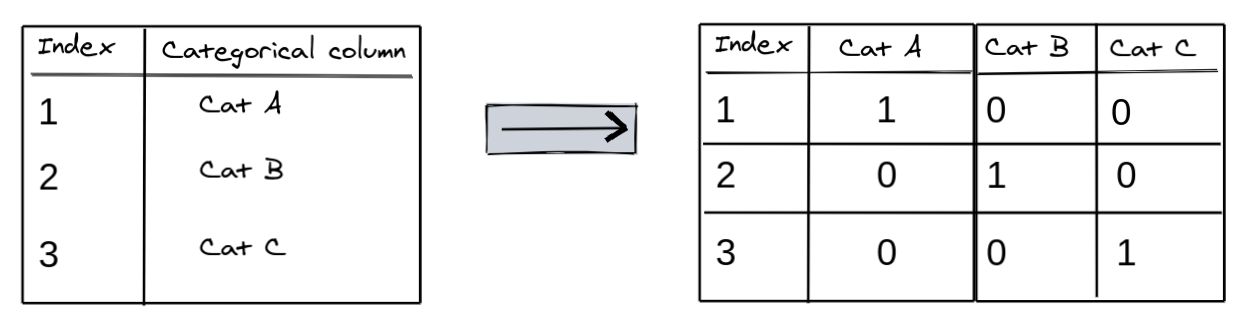

In [ ]:
pd.set_option("max_columns", None)

In [ ]:
accidents_df_one_hot = accidents_df.copy()

accidents_df_one_hot = pd.get_dummies(accidents_df_one_hot, columns=['Source'], prefix = ['Source'])

accidents_df_one_hot.head(5)

,ID,Severity,Start_Time,City,State,Airport_Code,Roundabout,Timezone,Source_Bing,Source_MapQuest,Source_MapQuest-Bing
544947,A-544968,3,2020-12-06 06:07:01,Los Angeles,CA,KCQT,False,US/Pacific,0,1,0
3580524,A-3587341,2,2020-03-19 19:17:39,Platteville,CO,KLMO,False,US/Mountain,1,0,0
1254691,A-1254794,3,2019-07-03 16:33:31,Irvine,CA,KSNA,False,US/Pacific,0,1,0
678867,A-678896,2,2020-09-04 11:43:40,San Mateo,CA,KSQL,False,US/Pacific,0,1,0
769064,A-769143,3,2020-05-10 15:16:27,Mesquite,TX,KHQZ,False,US/Central,0,1,0


You can even achieve one-hot encoding by directly creating a function as per our understanding of the concept of one-hot encoding.

In [12]:
def one_hot_encode(df,column):
  values = df[column].unique()
  for v in values:
    df[column+'_'+str(v)] = (df[column] == v).astype(int)

  return df

In [13]:
one_hot_encode(accidents_df.copy(), 'Source')

,ID,Severity,Start_Time,City,State,Source,Airport_Code,Roundabout,Timezone,Source_MapQuest,Source_Bing,Source_MapQuest-Bing
2184990,A-2185109,2,2018-04-12 15:38:29,Chapin,SC,MapQuest,KFDW,False,US/Eastern,1,0,0
3150724,A-3153670,2,2020-12-04 05:07:00,Davidsville,PA,Bing,KJST,False,US/Eastern,0,1,0
2897501,A-2897631,2,2017-04-04 17:51:35,Oklahoma City,OK,Bing,KPWA,False,US/Central,0,1,0
993362,A-993456,3,2019-12-02 15:05:51,Bellaire,TX,MapQuest,KMCJ,False,US/Central,1,0,0
3075896,A-3077803,2,2020-11-25 13:01:30.000000000,Houston,TX,Bing,KIAH,False,US/Central,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
897754,A-897838,3,2020-01-15 14:55:41,Independence,MO,MapQuest,KLXT,False,US/Central,1,0,0
1338579,A-1338682,2,2019-06-05 11:55:39,San Antonio,TX,MapQuest,KSAT,False,US/Central,1,0,0
346411,A-346421,3,2017-02-28 22:43:48,Los Angeles,CA,MapQuest,KCQT,False,US/Pacific,1,0,0
721719,A-721795,2,2020-08-10 10:04:09,Myrtle Beach,SC,MapQuest,KMYR,False,US/Eastern,1,0,0


As you can see, for the column `Source`:

after encoding, in the second table(in both techniques), we have dummy variables each representing a category in the feature `Source`. Now for each category that is present, we have 1 in the column of that category and 0 for the others.

The same can be achieved using `scikit-learn`'s `LabelBinarizer` and `OneHotEncoder` or even with `category_encoders`: 
Below I have implemented category_encoders's `.OneHotEncoder` method.

In [ ]:
import category_encoders as ce

In [ ]:
accidents_df_one_hot = accidents_df.copy()

encoder=ce.OneHotEncoder(cols='Source',handle_unknown='return_nan',return_df=True,use_cat_names=True)
data_encoded = encoder.fit_transform(accidents_df_one_hot)
data_encoded.head(5)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,ID,Severity,Start_Time,City,State,Source_MapQuest,Source_Bing,Source_MapQuest-Bing,Airport_Code,Roundabout,Timezone
544947,A-544968,3,2020-12-06 06:07:01,Los Angeles,CA,1.0,0.0,0.0,KCQT,False,US/Pacific
3580524,A-3587341,2,2020-03-19 19:17:39,Platteville,CO,0.0,1.0,0.0,KLMO,False,US/Mountain
1254691,A-1254794,3,2019-07-03 16:33:31,Irvine,CA,1.0,0.0,0.0,KSNA,False,US/Pacific
678867,A-678896,2,2020-09-04 11:43:40,San Mateo,CA,1.0,0.0,0.0,KSQL,False,US/Pacific
769064,A-769143,3,2020-05-10 15:16:27,Mesquite,TX,1.0,0.0,0.0,KHQZ,False,US/Central


While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in the formation of as many new columns, which can result in the curse of dimensionality.

The concept of the “curse of dimensionality” discusses that in high-dimensional spaces some things just stop working properly.

### 4. Binary Encoding:

This is a combination of one-hot encoding and Hash encoding! In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder (each unique category value is assigned an integer value eg, red-"1", blue-"2"). Then the numbers are transformed into a binary number. After that binary value is split into different columns. This results in fewer columns compared to one-hot encoding. 

Binary encoding works well when there are a high number of categories. For example, the `City` column in our dataset.  

You must wonder why don't we stop after the ordinal encoding part itself, or why is a need for having to convert them into their binary equivalent only to further make columns. Here's one reason why, 
- When our categorical column is not ordinal, and the number of categories is numerous, we can not apply only Label Encoding, as that will lead to poor decision-making of our model. Unlike the case of ordinal columns. Having one-fourth of the total number of categories as columns in the dataframe can help in better decision-making of our model.  

Once again I have used the `category_encoders` library and its `.BinaryEncoder` function to achieve this. 

In [ ]:
accidents_df_binary = accidents_df.copy()

encoder = ce.BinaryEncoder(cols=['City'])
df_binary = encoder.fit_transform(accidents_df_binary)

df_binary.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,ID,Severity,Start_Time,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13,City_14,State,Source,Airport_Code,Roundabout,Timezone
544947,A-544968,3,2020-12-06 06:07:01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,CA,MapQuest,KCQT,False,US/Pacific
3580524,A-3587341,2,2020-03-19 19:17:39,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,CO,Bing,KLMO,False,US/Mountain
1254691,A-1254794,3,2019-07-03 16:33:31,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,CA,MapQuest,KSNA,False,US/Pacific
678867,A-678896,2,2020-09-04 11:43:40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,CA,MapQuest,KSQL,False,US/Pacific
769064,A-769143,3,2020-05-10 15:16:27,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,TX,MapQuest,KHQZ,False,US/Central


Binary encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding. Further, It reduces the curse of dimensionality for data with high cardinality.

- **Note** that `category_encoders` is a very useful library for encoding categorical columns. Not only does it support one-hot, binary, and label encoding, but also other advanced encoding methods like Helmert contrast, polynomial contrast, backward difference, etc.

## Further Reading:

- [Other encoding techniques with category_encoder](https://contrib.scikit-learn.org/category_encoders/)

- [Categorical data with big data using pyspark](https://towardsdatascience.com/feature-encoding-with-spark-2-3-0-part-1-9ede45562740)

- [More on Categorical_encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)